In [1]:
from cv2 import threshold
import numpy as np
import yaml
import open3d
from pathlib import Path
import os
import cv2
import nthresh

from matplotlib import pyplot as plt 

from config.config import load_config_data


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def array_histogram_equalization(arr, number_bins=256):
    # from http://www.janeriksolem.net/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(arr, number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = (number_bins-1) * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(arr, bins[:-1], cdf)

    return image_equalized, cdf


In [3]:
arr=[1,2,3,4,5,6,7,8,9]
histogram, cumulative_distribution = array_histogram_equalization(arr, number_bins=10)



In [4]:
histogram

array([1.  , 2.25, 3.5 , 4.  , 5.  , 6.25, 7.5 , 8.75, 9.  ])

In [5]:


def get_rgb_list(_label):

    # c = color_dict[_label]
    if(_label == False):
        c = [0,0,0]
    else:
        c = [255,0,0]

    return np.array((c[0], c[1], c[2]))


def draw_pc(pc_xyzrgb):
    pc = open3d.geometry.PointCloud()
    pc.points = open3d.utility.Vector3dVector(pc_xyzrgb[:, 0:3])
    pc.colors = open3d.utility.Vector3dVector(pc_xyzrgb[:, 3:6] / 255.)

    def custom_draw_geometry_with_key_callback(pcd):
        def change_background_to_black(vis):
            opt = vis.get_render_option()
            opt.background_color = np.asarray([0, 0, 0])
            opt.point_size = 1
            return False

        key_to_callback = {}
        key_to_callback[ord("K")] = change_background_to_black
        open3d.visualization.draw_geometries_with_key_callbacks([pcd], key_to_callback)

    custom_draw_geometry_with_key_callback(pc)


def concate_color(_points, _label):
    color = np.zeros((_points.shape[0], 3))
    label_id = np.unique(_label)
    # print(label_id)
    # print('---------------------------------------------')
    pass
    for cls in label_id:
        if label_filter.__len__() == 0:
            color[_label == cls] = get_rgb_list(cls)
        elif label_filter.count(cls) == 0:
            color[_label == cls] = get_rgb_list(cls) # kol el 7agat ely leha el label bta3 l unique label cls , ta5d el loon bta3ha
    _points = np.concatenate([_points, color], axis=1)
    return _points



################################______MAIN______################################


points_dir = Path('/home/mnabail/repos/Cylinder3D_spconv_v2_LANDMARKINGS/demo_lidar_input/') # path to .bin data
label_dir = Path('/home/mnabail/repos/Cylinder3D_spconv_v2_LANDMARKINGS/demosave/') # path to .label data
# points_dir = Path('/home/mnabail/repos/Cylinder3D_spconv_v2/inference_cluster/lidar_pc_val/') # path to .label data
# label_dir = Path('/home/mnabail/repos/Cylinder3D_spconv_v2/inference_cluster/lidar_labels/') # path to .bin data

label_filter = [40, 48, 70, 72]    # object's label which you wan't to show
with open('/home/mnabail/repos/Cylinder3D_spconv_v2/config/label_mapping/nuscenes.yaml', 'r') as stream: # label_mapping configuration file
    label_mapping = yaml.safe_load(stream)
    color_dict = label_mapping['color_map']

#print('----------------------------------------------------------------------------------')
for it_scan, it_label in zip(sorted(points_dir.iterdir()), sorted(label_dir.iterdir())):
    bin_name=str(it_scan).split('/')[-1]
    label_name=str(it_label).split('/')[-1]
    old_name=str(it_label)
    new_name=str(label_dir)+'/'+bin_name[:-4]+'.label'
    os.rename(old_name,new_name)
    # print("bin name=",bin_name, "  label name=",label_name)
    # print('old name: ',old_name)
    # print("new name=",new_name)
    # print('--------------------------------------------')

# input("break now")

#list of 50 different rgb colors


config_path='config/nuScenes.yaml'
configs = load_config_data(config_path)
dataset_config = configs['dataset_params']
with open(dataset_config["label_mapping"], 'r') as stream:
    nuscenesyaml = yaml.safe_load(stream)
labels_16 = nuscenesyaml['labels_16']



dataset_config = configs['dataset_params']


BIN NAME= 000540
mean= 0.060843777


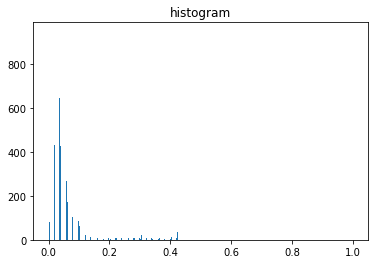

max= 0.43137255
[[0.00000000e+00 4.20000000e+01]
 [3.92156886e-03 8.00000000e+01]
 [7.84313772e-03 1.31000000e+02]
 [1.17647061e-02 9.10000000e+01]
 [1.56862754e-02 2.41000000e+02]
 [1.96078438e-02 4.31000000e+02]
 [2.35294122e-02 5.63000000e+02]
 [2.74509806e-02 5.15000000e+02]
 [3.13725509e-02 9.42000000e+02]
 [3.52941193e-02 6.44000000e+02]
 [3.92156877e-02 4.26000000e+02]
 [4.31372561e-02 5.91000000e+02]
 [4.70588244e-02 4.09000000e+02]
 [5.09803928e-02 5.58000000e+02]
 [5.49019612e-02 3.21000000e+02]
 [5.88235296e-02 2.69000000e+02]
 [6.27451017e-02 1.74000000e+02]
 [6.66666701e-02 1.22000000e+02]
 [7.05882385e-02 2.00000000e+02]
 [7.45098069e-02 6.70000000e+01]
 [7.84313753e-02 1.02000000e+02]
 [8.23529437e-02 1.26000000e+02]
 [8.62745121e-02 6.60000000e+01]
 [9.01960805e-02 1.07000000e+02]
 [9.41176489e-02 4.60000000e+01]
 [9.80392173e-02 8.40000000e+01]
 [1.01960786e-01 6.50000000e+01]
 [1.05882354e-01 4.50000000e+01]
 [1.09803922e-01 5.60000000e+01]
 [1.13725491e-01 3.40000000

In [9]:

for it in sorted(label_dir.iterdir()):
    label_file = it
    print("BIN NAME=",str(it.stem))
    points_file = points_dir / (str(it.stem) + '.bin')
    labels = np.fromfile(label_file, dtype=np.uint32)
    points = np.fromfile(points_file, dtype=np.float32).reshape((-1, 5))

    # x, y, z, inetnsity, ring_index
    points_full = np.fromfile(points_file, dtype=np.float32).reshape((-1, 5))[:, 0:5]



    # for i in labels_16:
    #     if(i!=11):
    #         continue
    i=11

    points_to_threshold=points_full[labels==i]
    points_to_threshold=np.array(points_to_threshold)

    # points_to_threshold=points_to_threshold[  points_to_threshold[:,3]<0.1   ]

    ground=points_to_threshold[:,3]
    print('mean=',np.mean(ground))
    normalised_hist,_=array_histogram_equalization(ground, number_bins=100)
    
    
    _bins=np.arange(start=0.0, stop=1.0, step=0.001)
    plt.hist(ground, bins =_bins) 
    plt.title("histogram") 
    plt.savefig('histogram.png')
    plt.savefig('histogram1.png')
    plt.show()

    unique, counts = np.unique(ground, return_counts=True)
    print('max=',np.max(ground))
    print(np.asarray((unique, counts)).T)
    threshold = nthresh.nthresh(normalised_hist, n_classes=2, bins=10, n_jobs=1)


    break



In [7]:
threshold

(74.27212073736753,)

In [1]:
import numpy as np
import open3d as o3d


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [65]:

points_file='/home/mnabail/repos/Cylinder3D_spconv_v2_LANDMARKINGS/four_to_five/waymo_points_converted.bin'

In [66]:
points = np.fromfile(points_file, dtype=np.float32).reshape((-1, 5))


In [67]:

points.shape

(184522, 5)

In [68]:

ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:,:3])
o3d.visualization.draw_geometries([pcd])


In [56]:
arr= np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


In [57]:
arr.shape


(3, 3)

In [58]:
arr=arr.flatten()


In [59]:
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
from numpy import dtype


arr.astype(np.int32).tofile('test.bin')

In [63]:
arr_2 = np.fromfile('test.bin', dtype=np.int32).reshape((-1, 3))

In [64]:
arr_2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

array([1, 3, 5, 7, 9])

array([ 2,  4,  6,  8, 10])